# Data Loading

In [1]:
import os
import pandas as pd
data_dir = './../DataFiles/StreamingDataWithLabels/' #note to modify directory if changes
files = os.listdir(data_dir)
print(f'data files: {files}')
dfs = []
for file in files:
    try:
        if file.endswith(".xlsx"):
            df = pd.read_excel(data_dir + file, header=None)
        elif file.endswith(".csv"):
            df = pd.read_csv(data_dir + file, header=None)
        dfs.append(df)
    except Exception as e:
        print(file, e)
    
df = pd.concat(dfs, axis=0)
# first col is label, second is text
df.columns=['label','comment']

# remove missing, duplicate, and abnormal samples
df = df.dropna()
df = df.drop_duplicates()
df = df[df['label'].isin([0.0,'-1',-1.0, 1.0,'0','1'])]

df['label'] = df['label'].astype('int')
df['comment'] = df['comment'].astype('str')
print(f"The labels in the original training set:\n {df['label'].value_counts()}")

data files: ['annotations_pos.csv', 'Neg1.csv', 'Neg2.xlsx', 'objective1.csv', 'Objective_2.csv', 'Positive1.csv', 'positive_2.csv']
annotations_pos.csv 'utf-8' codec can't decode byte 0x80 in position 30: invalid start byte
objective1.csv 'utf-8' codec can't decode bytes in position 260-261: invalid continuation byte
positive_2.csv 'utf-8' codec can't decode bytes in position 229-230: invalid continuation byte
The labels in the original training set:
 -1    4238
 0    1886
 1     610
Name: label, dtype: int64


# Text Data cleaning

In [6]:
from nltk.corpus import stopwords
import string
import re
from nltk import *

# load stopwords
stop_words = stopwords.words('english')
stop_words.append("https")
stop_words.append('\'s')

porter = PorterStemmer()
def remove_noise(text):
    tokens = word_tokenize(text) # participle
    tokens_filtered = [w for w in tokens if w.lower() not in stop_words and w.lower() not in string.punctuation] # filter abnormal words
    return tokens_filtered


df['comment_pre'] = df['comment'].apply(remove_noise)
df.head()

,label,comment,comment_pre
0,0,Know who Pacific Islanders are?€?the Indigenou...,"[Know, Pacific, Islanders, €, Indigenous, peop..."
1,-1,States keep up with lawsuits against China for...,"[States, keep, lawsuits, China, 'malicious, ro..."
3,0,#AAPIHM Lesson #1: We've been here a long tim...,"[AAPIHM, Lesson, 1, 've, long, time, history, ..."
4,-1,Friends in India this is important information...,"[Friends, India, important, information, hopef..."
5,1,Suddenly the media has stopped covering the ri...,"[Suddenly, media, stopped, covering, rise, hat..."


# Negative Word Cloud

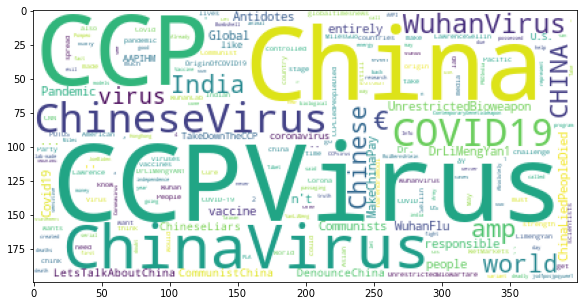

In [10]:
from functools import reduce
df_negetive = df[df['label']==-1]
df_negetive.head()
texts= df_negetive['comment_pre'].tolist()

word_list = reduce(lambda x,y:x+y,texts)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

from collections import Counter
word_frequence = dict(Counter(word_list).most_common(1000))
word_frequence
wordcloud=WordCloud(background_color="white",max_font_size=80)
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

# Objective Word Cloud

    label                                            comment  \
0       0  Know who Pacific Islanders are?€?the Indigenou...   
3       0  #AAPIHM  Lesson #1: We've been here a long tim...   
14      0  #AsianAmericans are 9x more likely than Whites...   
32      0  Next big &amp; perhaps most difficult challeng...   
33      0  @MercedesGlobal @TheWestBlock @HarjitSajjan @C...   

                                          comment_pre  
0   [Know, Pacific, Islanders, €, Indigenous, peop...  
3   [AAPIHM, Lesson, 1, 've, long, time, history, ...  
14  [AsianAmericans, 9x, likely, Whites, asked, as...  
32  [Next, big, amp, perhaps, difficult, challenge...  
33  [MercedesGlobal, TheWestBlock, HarjitSajjan, C...  


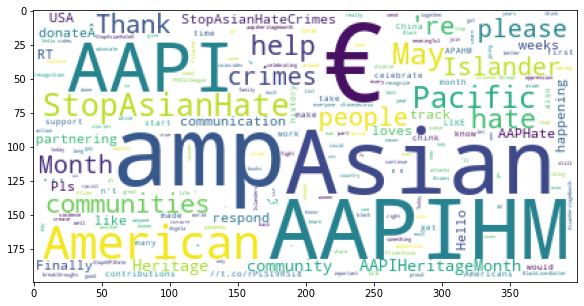

In [11]:
from functools import reduce
df_objetctive = df[df['label']==0]
print(df_objetctive.head())
texts= df_objetctive['comment_pre'].tolist()

word_list = reduce(lambda x,y:x+y,texts)
word_list[0:50]

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

from collections import Counter
word_frequence = dict(Counter(word_list).most_common(1000))
word_frequence
wordcloud=WordCloud(background_color="white",max_font_size=80)
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

# Positive Word Cloud

    label                                            comment  \
5       1  Suddenly the media has stopped covering the ri...   
9       1  Dear @NikkiHaley: Kids called me chink in 1st ...   
31      1  Suddenly the media has stopped covering the ri...   
51      1  Dear @NikkiHaley: Kids called me chink in 1st ...   
66      1  Happy Asian American &amp; Pacific Islander He...   

                                          comment_pre  
5   [Suddenly, media, stopped, covering, rise, hat...  
9   [Dear, NikkiHaley, Kids, called, chink, 1st, g...  
31  [Suddenly, media, stopped, covering, rise, hat...  
51  [Dear, NikkiHaley, Kids, called, chink, 1st, g...  
66  [Happy, Asian, American, amp, Pacific, Islande...  


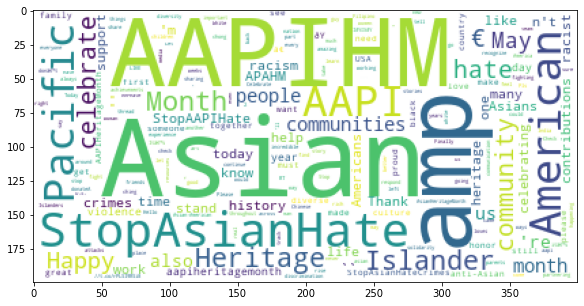

In [9]:
from functools import reduce
df_positive = df[df['label']==1]
print(df_positive.head())
texts= df_positive['comment_pre'].tolist()

word_list = reduce(lambda x,y:x+y,texts)
word_list[0:50]

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

from collections import Counter
word_frequence = dict(Counter(word_list).most_common(1000))
word_frequence
wordcloud=WordCloud(background_color="white",max_font_size=80)
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)